
1. Generate the following two functions:

    Dataset 1:
    ```python
    num_samples = 40
    np.random.seed(45)
        
    # Generate data
    x1 = np.random.uniform(-20, 20, num_samples)
    f_x = 100*x1 + 1
    eps = np.random.randn(num_samples)
    y = f_x + eps
    ```
    
    Dataset 2:
    ```python
    np.random.seed(45)
    num_samples = 40
        
    # Generate data
    x1 = np.random.uniform(-1, 1, num_samples)
    f_x = 3*x1 + 4
    eps = np.random.randn(num_samples)
    y = f_x + eps
    ```

- Implement full-batch and stochastic gradient descent. Find the average number of steps it takes to converge to an $\epsilon$-neighborhood of the minimizer for both datasets. Visualize the convergence process for 15 epochs. Choose $\epsilon = 0.001$ for convergence criteria. Which dataset and optimizer takes a larger number of epochs to converge, and why? Show the contour plots for different epochs (or show an animation/GIF) for visualisation of optimisation process. Also, make a plot for Loss v/s epochs. **[2 marks]**
- Explore the article [here](https://machinelearningmastery.com/gradient-descent-with-momentum-from-scratch/#:~:text=Momentum%20is%20an%20extension%20to,spots%20of%20the%20search%20space.) on gradient descent with momentum. Implement gradient descent with momentum for the above two datasets. Visualize the convergence process for 15 steps. Compare the average number of steps taken with gradient descent (both variants -- full batch and stochastic) with momentum to that of vanilla gradient descent to converge to an $\epsilon$-neighborhood of the minimizer for both datasets. Choose $\epsilon = 0.001$. Write down your observations. Show the contour plots for different epochs for momentum implementation. Specifically, show all the vectors: gradient, current value of theta, momentum, etc. **[2 marks]**

## Part 1

In [ ]:
import numpy as np

def calculate_mse(theta, x, y):
    num_samples = len(y)
    x = np.c_[np.ones(num_samples), x]  # Add intercept term
    y_pred = np.dot(x, theta)
    mse = np.mean((y_pred - y) ** 2)
    return mse

def full_batch_gradient_descent(x, y, learning_rate, true_mse, epsilon, max_iter=2500):
    num_samples = len(y)
    x = np.c_[np.ones(num_samples), x]  # Add intercept term
    theta = np.zeros(x.shape[1])
    steps = 0
    mse_history=[]
    while steps < max_iter:
        mse = calculate_mse(theta, x[:, 1:], y)
        mse_history.append(mse)
        if mse < true_mse + epsilon:
            steps+=1
            break
        gradient = np.dot(x.T, np.dot(x, theta) - y)
        theta -= learning_rate * gradient
        steps += 1
    return steps,mse_history,steps

def stochastic_gradient_descent(x, y, learning_rate, true_mse, epsilon, max_iter=2500):
    num_samples = len(y)
    x = np.c_[np.ones(num_samples), x]  # Add intercept term
    theta = np.zeros(x.shape[1])
    steps = 0
    epochs = 0
    mse_history=[]
    while epochs < max_iter:
        D = np.concatenate((x.reshape((40,2)),y.reshape((40,1))),axis=1)
        np.random.shuffle(D)
        x = D[:,:-1].reshape((40,2))
        y = D[:,-1:].reshape((40,))
        for i in range(num_samples):
            gradient = np.dot(x[i], np.dot(x[i], theta) - y[i])
            theta -= learning_rate * gradient
            mse = calculate_mse(theta, x[:, 1:], y)
            mse_history.append(mse)
            if abs(mse-true_mse) < epsilon:
                steps+=1
                break
            steps += 1
        if abs(mse-true_mse) < epsilon:
                steps+=1
                break
        epochs += 1
    return steps,mse_history,epochs

def average_steps_to_converge(x, y, true_mse, algorithm, learning_rate, epsilon, num_trials=100):
    total_steps = 0
    total_epochs = 0
    for _ in range(num_trials):
        np.random.seed(_)  # Ensuring different random initialization for each trial
        if algorithm == 'full_batch':
            steps,mse_history,epochs = full_batch_gradient_descent(x, y, learning_rate, true_mse, epsilon)
        elif algorithm == 'stochastic':
            steps,mse_history,epochs = stochastic_gradient_descent(x, y, learning_rate, true_mse, epsilon)
        elif algorithm == 'stochastic_momentum':
            steps,mse_history,path,epochs = stochastic_gradient_descent_momentum(x, y, learning_rate, true_mse, epsilon)
        elif algorithm == 'full_batch_momentum':
            steps,mse_history,path,epochs = full_batch_gradient_descent_momentum(x, y, learning_rate, true_mse, epsilon)
        total_steps += steps
        total_epochs += epochs
    avg_steps = total_steps / num_trials
    avg_epochs = total_epochs / num_trials

    if (avg_epochs==2500):
      return "Did not converge in 10000 epochs!"
    else :
      return f"{avg_steps} iterations, {avg_epochs} epochs"


# Dataset 1
np.random.seed(45)
num_samples = 40
x1_dataset1 = np.random.uniform(-20, 20, num_samples)
f_x_dataset1 = 100 * x1_dataset1 + 1
eps_dataset1 = np.random.randn(num_samples)
y_dataset1 = f_x_dataset1 + eps_dataset1
true_mse_dataset1 = np.mean(eps_dataset1 ** 2)

# Dataset 2
np.random.seed(45)
num_samples = 40
x1_dataset2 = np.random.uniform(-1, 1, num_samples)
f_x_dataset2 = 3 * x1_dataset2 + 4
eps_dataset2 = np.random.randn(num_samples)
y_dataset2 = f_x_dataset2 + eps_dataset2
true_mse_dataset2 = np.mean(eps_dataset2 ** 2)

# Parameters
learning_rate_1 = 0.0001
learning_rate_2 = 0.02
epsilon = 0.001
num_trials = 100


In [ ]:
steps_sgd2, mse_history_dataset2_stochastic, epochs_sgd2 = stochastic_gradient_descent(x1_dataset2, y_dataset2, learning_rate_2, true_mse_dataset2, epsilon, 100000)

In [ ]:
steps_sgd2

365

In [ ]:
print("Target MSE for the two datasets is epsilon neighbourhood near:",true_mse_dataset1,true_mse_dataset2)

Target MSE for the two datasets is epsilon neighbourhood near: 0.6273779621282352 0.6273779621282352


In [ ]:
# learning_rate_1 = 0.0001
# learning_rate_2 = 0.02
#Computing average steps to converge
avg_steps_dataset1_full_batch = average_steps_to_converge(x1_dataset1, y_dataset1, true_mse_dataset1, 'full_batch', learning_rate_1, epsilon, num_trials)
avg_steps_dataset1_stochastic = average_steps_to_converge(x1_dataset1, y_dataset1, true_mse_dataset1, 'stochastic', learning_rate_1, epsilon, num_trials)

avg_steps_dataset2_full_batch = average_steps_to_converge(x1_dataset2, y_dataset2, true_mse_dataset2, 'full_batch', learning_rate_2, epsilon, num_trials)
avg_steps_dataset2_stochastic = average_steps_to_converge(x1_dataset2, y_dataset2, true_mse_dataset2, 'stochastic', learning_rate_2, epsilon, num_trials)


print("Average Steps to Converge (Dataset 1):")
print("Full Batch:", avg_steps_dataset1_full_batch)
print("Stochastic:", avg_steps_dataset1_stochastic)

print("\nAverage Steps to Converge (Dataset 2):")
print("Full Batch:", avg_steps_dataset2_full_batch)
print("Stochastic:", avg_steps_dataset2_stochastic)


Average Steps to Converge (Dataset 1):
Full Batch: 648.0 iterations, 648.0 epochs
Stochastic: 25670.94 iterations, 641.16 epochs

Average Steps to Converge (Dataset 2):
Full Batch: 10.0 iterations, 10.0 epochs
Stochastic: 19588.18 iterations, 489.26 epochs


In [ ]:
# learning_rate_1 = 0.001
# learning_rate_2 = 0.001
#Computing average steps to converge
avg_steps_dataset1_full_batch = average_steps_to_converge(x1_dataset1, y_dataset1, true_mse_dataset1, 'full_batch', learning_rate_1, epsilon, num_trials)
avg_steps_dataset1_stochastic = average_steps_to_converge(x1_dataset1, y_dataset1, true_mse_dataset1, 'stochastic', learning_rate_1, epsilon, num_trials)

avg_steps_dataset2_full_batch = average_steps_to_converge(x1_dataset2, y_dataset2, true_mse_dataset2, 'full_batch', learning_rate_2, epsilon, num_trials)
avg_steps_dataset2_stochastic = average_steps_to_converge(x1_dataset2, y_dataset2, true_mse_dataset2, 'stochastic', learning_rate_2, epsilon, num_trials)


print("Average Steps to Converge (Dataset 1):")
print("Full Batch:", avg_steps_dataset1_full_batch)
print("Stochastic:", avg_steps_dataset1_stochastic)

print("\nAverage Steps to Converge (Dataset 2):")
print("Full Batch:", avg_steps_dataset2_full_batch)
print("Stochastic:", avg_steps_dataset2_stochastic)


<ipython-input-4-4e664d17ceb3>:7: RuntimeWarning: overflow encountered in square
  mse = np.mean((y_pred - y) ** 2)
<ipython-input-4-4e664d17ceb3>:23: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradient


Average Steps to Converge (Dataset 1):
Full Batch: 2500.0 iterations, 2500.0 epochs
Stochastic: 2367.24 iterations, 58.61 epochs

Average Steps to Converge (Dataset 2):
Full Batch: 186.0 iterations, 186.0 epochs
Stochastic: 7397.28 iterations, 184.41 epochs


## Observation:
We observe the following key points-
- On both the datasets, given the same learning rates, Full batch gradient descent takes more epochs than the stochastic gradient descent. The difference appears to be small in case of the second dataset.
- When the learning rate for dataset 1 was 0.0001, both algorithms converged around the 640 epochs. But if we consider the number of iterations taken, then full batch gradient descent significantly outperforms SGD. This is expected because at each iteration Full batch GD sees the complete dataset while SGD only sees one data point.
- When the learning rate was kept 0.01, Full batch gradient descent was not able to converge even in 10000 epochs. But SGD converge very quickly (8 epochs).

## Part 2

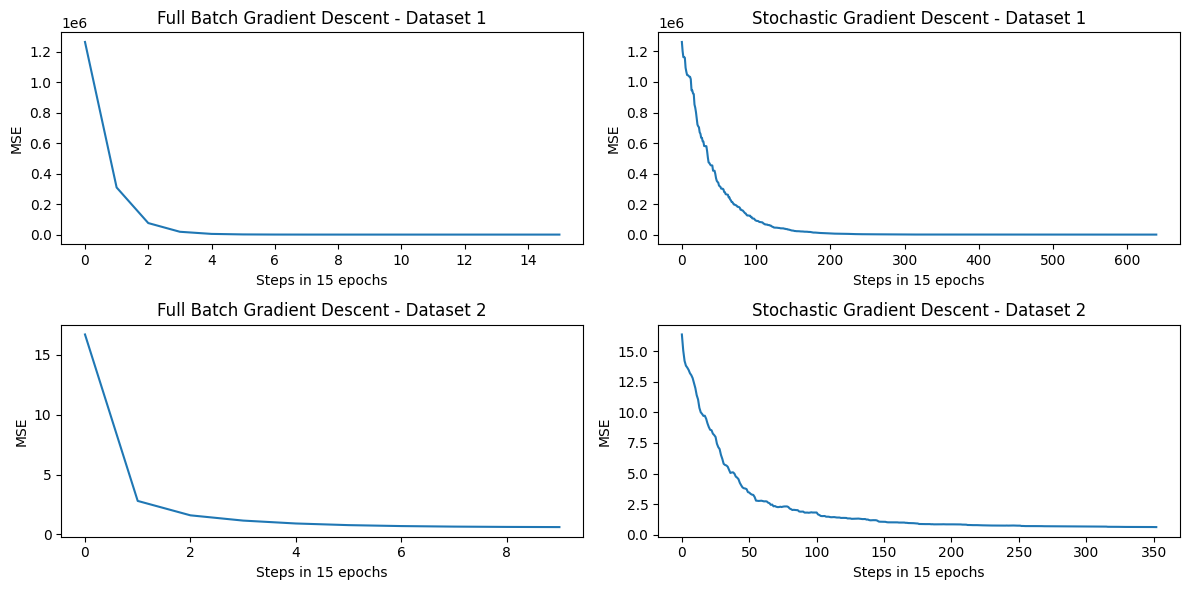

In [ ]:
import matplotlib.pyplot as plt

# Computing MSE history for convergence visualization
steps_gd1, mse_history_dataset1_full_batch, epochs_gd1 = full_batch_gradient_descent(x1_dataset1, y_dataset1, learning_rate_1, true_mse_dataset1, epsilon, 16)
steps_sgd1, mse_history_dataset1_stochastic, epochs_sgd1 = stochastic_gradient_descent(x1_dataset1, y_dataset1, learning_rate_1, true_mse_dataset1, epsilon, 16)

steps_gd2, mse_history_dataset2_full_batch, epochs_gd2 = full_batch_gradient_descent(x1_dataset2, y_dataset2, learning_rate_2, true_mse_dataset2, epsilon, 16)
steps_sgd2, mse_history_dataset2_stochastic, epochs_sgd2 = stochastic_gradient_descent(x1_dataset2, y_dataset2, learning_rate_2, true_mse_dataset2, epsilon, 16)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(range(len(mse_history_dataset1_full_batch)), mse_history_dataset1_full_batch)
plt.title('Full Batch Gradient Descent - Dataset 1')
plt.xlabel('Steps in 15 epochs')
plt.ylabel('MSE')

plt.subplot(2, 2, 2)
plt.plot(range(len(mse_history_dataset1_stochastic)), mse_history_dataset1_stochastic)
plt.title('Stochastic Gradient Descent - Dataset 1')
plt.xlabel('Steps in 15 epochs')
plt.ylabel('MSE')

plt.subplot(2, 2, 3)
plt.plot(range(len(mse_history_dataset2_full_batch)), mse_history_dataset2_full_batch)
plt.title('Full Batch Gradient Descent - Dataset 2')
plt.xlabel('Steps in 15 epochs')
plt.ylabel('MSE')

plt.subplot(2, 2, 4)
plt.plot(range(len(mse_history_dataset2_stochastic)), mse_history_dataset2_stochastic)
plt.title('Stochastic Gradient Descent - Dataset 2')
plt.xlabel('Steps in 15 epochs')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()


The Graphs display the following facts:
- All the curves seem to be able to converge in similar manner. In dataset 2, both the algorithms converged even before 15 epochs.
- The curve of Full batch gradient descent for both datasets is smooth and continuously decreasing while that of SGD is rough and contains some points where the error is even increasing. This is due to the fact that in SGD, we only calculate gradient with respect to each data point, and thus the ouptput gradient may not be the true gradient and thus we take many steps in the wrong directions causing the curve to be rough.

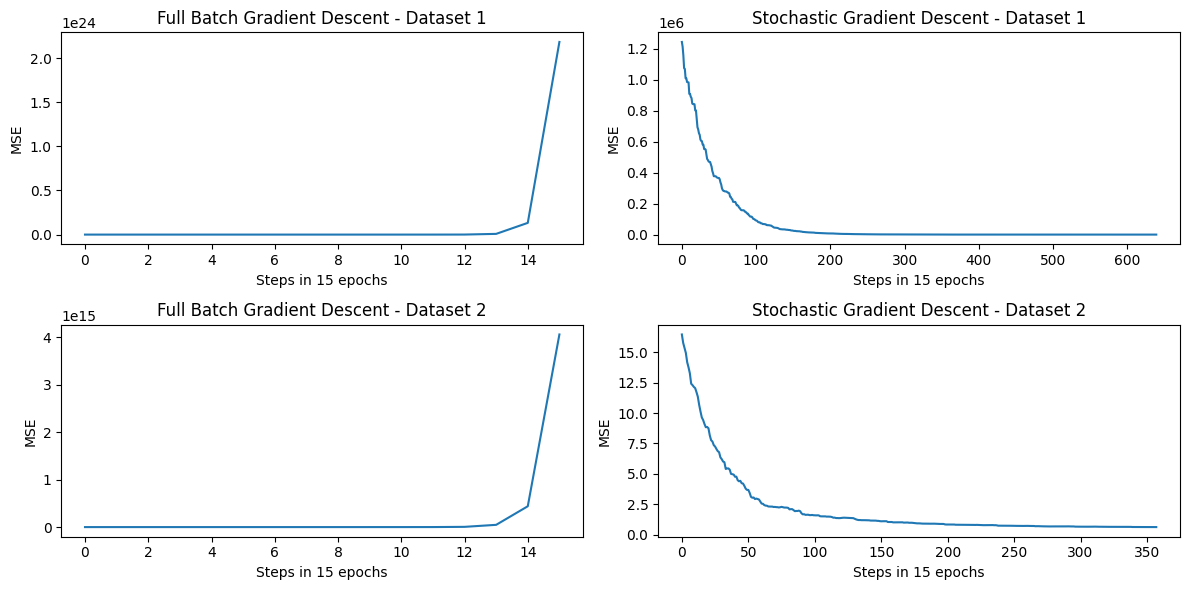

In [ ]:
import matplotlib.pyplot as plt

# Computing MSE history for convergence visualization
steps_gd1, mse_history_dataset1_full_batch, epochs_gd1 = full_batch_gradient_descent(x1_dataset1, y_dataset1, learning_rate_1_fb, true_mse_dataset1, epsilon, 16)
steps_sgd1, mse_history_dataset1_stochastic, epochs_sgd1 = stochastic_gradient_descent(x1_dataset1, y_dataset1, learning_rate_1_sgd, true_mse_dataset1, epsilon, 16)

steps_gd2, mse_history_dataset2_full_batch, epochs_gd2 = full_batch_gradient_descent(x1_dataset2, y_dataset2, learning_rate_2_fb, true_mse_dataset2, epsilon, 16)
steps_sgd2, mse_history_dataset2_stochastic, epochs_sgd2 = stochastic_gradient_descent(x1_dataset2, y_dataset2, learning_rate_2_sgd, true_mse_dataset2, epsilon, 16)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(range(len(mse_history_dataset1_full_batch)), mse_history_dataset1_full_batch)
plt.title('Full Batch Gradient Descent - Dataset 1')
plt.xlabel('Steps in 15 epochs')
plt.ylabel('MSE')

plt.subplot(2, 2, 2)
plt.plot(range(len(mse_history_dataset1_stochastic)), mse_history_dataset1_stochastic)
plt.title('Stochastic Gradient Descent - Dataset 1')
plt.xlabel('Steps in 15 epochs')
plt.ylabel('MSE')

plt.subplot(2, 2, 3)
plt.plot(range(len(mse_history_dataset2_full_batch)), mse_history_dataset2_full_batch)
plt.title('Full Batch Gradient Descent - Dataset 2')
plt.xlabel('Steps in 15 epochs')
plt.ylabel('MSE')

plt.subplot(2, 2, 4)
plt.plot(range(len(mse_history_dataset2_stochastic)), mse_history_dataset2_stochastic)
plt.title('Stochastic Gradient Descent - Dataset 2')
plt.xlabel('Steps in 15 epochs')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()


Observing the graphs for larger learning rate in dataset 1, we see in full batch gradient  descent, the high learning rate has caused it to diverge and thus the error keeps increasing. While in SGD, initially diverges and has many ups and downs in the curve, it eventually converges.

In [ ]:
mse_history_dataset1_stochastic[-20:]

[1.5631643995103104,
 5.141682528551629,
 4.1952223973549065,
 20.906909158982135,
 20.61311667994475,
 8.020113289874308,
 1.7920481115213385,
 0.6063557837386607,
 1.5714282285600911,
 1.3108252500467827,
 3.7291062526779784,
 3.8129903873956876,
 21.397341038071907,
 1.6391403313499626,
 1.6113829998538214,
 1.1001472393456633,
 0.6869160246840724,
 0.6199951759962983,
 0.6035326144130544,
 0.6283239041470405]

## Part 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def calculate_mse(theta, x, y):
    num_samples = len(y)
    x = np.c_[np.ones(num_samples), x]  # Add intercept term
    y_pred = np.dot(x, theta)
    mse = np.mean((y_pred - y) ** 2)
    return mse

def full_batch_gradient_descent(x, y, learning_rate, true_mse, epsilon, max_iter=1500):
    num_samples = len(y)
    x = np.c_[np.ones(num_samples), x]  # Add intercept term
    theta = np.zeros(x.shape[1])
    theta_history = [theta.copy()]
    for _ in range(max_iter):
        gradient = np.dot(x.T, np.dot(x, theta) - y) / num_samples
        theta -= learning_rate * gradient
        theta_history.append(theta.copy())
    return theta_history

def stochastic_gradient_descent(x, y, learning_rate, true_mse, epsilon, max_iter=1500):
    num_samples = len(y)
    x = np.c_[np.ones(num_samples), x]  # Add intercept term
    theta = np.zeros(x.shape[1])
    theta_history = [theta.copy()]
    for _ in range(max_iter):
        D = np.concatenate((x.reshape((40,2)),y.reshape((40,1))),axis=1)
        np.random.shuffle(D)
        x = D[:,:-1].reshape((40,2))
        y = D[:,-1:].reshape((40,))
        for i in range(num_samples):
            gradient = np.dot(x[i], np.dot(x[i], theta) - y[i])
            theta -= learning_rate * gradient
            theta_history.append(theta.copy())
    return theta_history

# Dataset 1
np.random.seed(45)
num_samples = 40
x1_dataset1 = np.random.uniform(-20, 20, num_samples)
f_x_dataset1 = 100 * x1_dataset1 + 1
eps_dataset1 = np.random.randn(num_samples)
y_dataset1 = f_x_dataset1 + eps_dataset1
true_mse_dataset1 = np.mean(eps_dataset1 ** 2)

# Dataset 2
np.random.seed(45)
num_samples = 40
x1_dataset2 = np.random.uniform(-1, 1, num_samples)
f_x_dataset2 = 3 * x1_dataset2 + 4
eps_dataset2 = np.random.randn(num_samples)
y_dataset2 = f_x_dataset2 + eps_dataset2
true_mse_dataset2 = np.mean(eps_dataset2 ** 2)

# # Parameters
# learning_rate_1_fb = 0.0001
# learning_rate_1_sgd = 0.0001
# learning_rate_2_fb = 0.02
# learning_rate_2_sgd = 0.02
# epsilon = 0.001
# max_iter = 15

learning_rate_1_fb = 0.001
learning_rate_1_sgd = 0.0001
learning_rate_2_fb = 0.1
learning_rate_2_sgd = 0.02
# Compute optimization trajectories
trajectory_dataset1_full_batch = full_batch_gradient_descent(x1_dataset1, y_dataset1, learning_rate_1_fb, true_mse_dataset1, epsilon, max_iter)
trajectory_dataset1_stochastic = stochastic_gradient_descent(x1_dataset1, y_dataset1, learning_rate_1_sgd, true_mse_dataset1, epsilon, max_iter)

trajectory_dataset2_full_batch = full_batch_gradient_descent(x1_dataset2, y_dataset2, learning_rate_2_fb, true_mse_dataset2, epsilon, max_iter)
trajectory_dataset2_stochastic = stochastic_gradient_descent(x1_dataset2, y_dataset2, learning_rate_2_sgd, true_mse_dataset2, epsilon, max_iter)



In [ ]:
trajectory_dataset2_stochastic[-1]

array([3.94045179, 2.60429938])

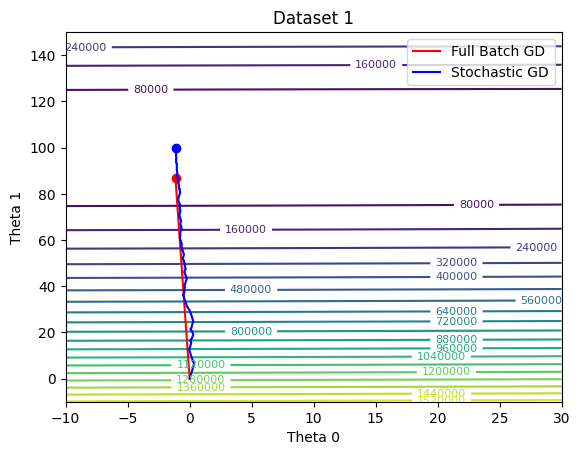

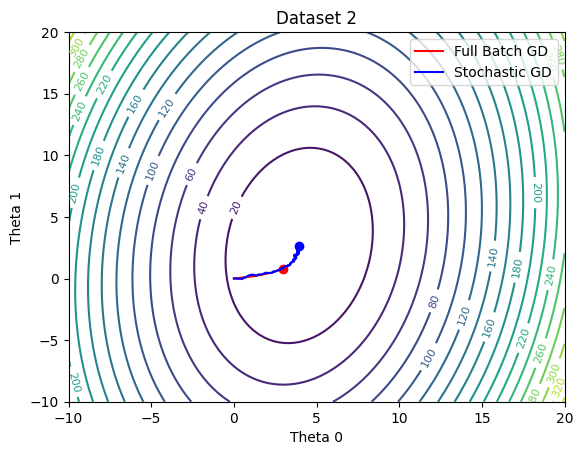

In [ ]:
def plot_contour_with_trajectory(trajectory_fb, trajectory_sg, x, y, true_mse, title,rang):
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel('Theta 0')
    ax.set_ylabel('Theta 1')

    # Create grid for contour plot
    theta0_vals = np.linspace(-10, rang[0], 100)
    theta1_vals = np.linspace(-10, rang[1], 100)
    T0, T1 = np.meshgrid(theta0_vals, theta1_vals)
    Z = np.array([[calculate_mse([t0, t1], x, y) for t0 in theta0_vals] for t1 in theta1_vals])

    # Plot contours
    contours = ax.contour(T0, T1, Z, levels=20, cmap='viridis')
    ax.clabel(contours, inline=True, fontsize=8)

    # Plot trajectories
    ax.plot([point[0] for point in trajectory_fb], [point[1] for point in trajectory_fb], color='red', label='Full Batch GD')
    ax.scatter(trajectory_fb[-1][0], trajectory_fb[-1][1], color='red')
    ax.plot([point[0] for point in trajectory_sg], [point[1] for point in trajectory_sg], color='blue', label='Stochastic GD')
    ax.scatter(trajectory_sg[-1][0], trajectory_sg[-1][1], color='blue')

    ax.legend()

# Plot contour with trajectories for Dataset 1
plot_contour_with_trajectory(trajectory_dataset1_full_batch, trajectory_dataset1_stochastic, x1_dataset1, y_dataset1, true_mse_dataset1, 'Dataset 1',[30,150])

plt.show()

# Plot contour with trajectories for Dataset 2
plot_contour_with_trajectory(trajectory_dataset2_full_batch, trajectory_dataset2_stochastic, x1_dataset2, y_dataset2, true_mse_dataset2, 'Dataset 2',[20,20])

plt.show()


Observing the convergence procedure for 15 epochs shows us that in gradient descent, we are smoothly moving directly towards the point of minima. While in SGD, we seem to be going in various directions but overall we progress towards the minima only. This demonstrates how SGD is unbiased estimate of the true gradient because on average, they move in the same directions.

## Part 4

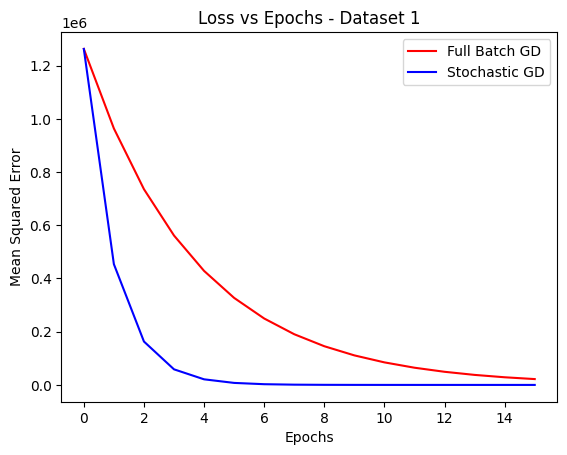

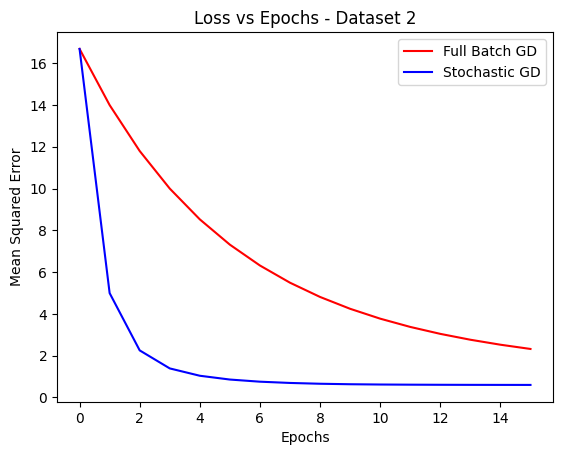

In [ ]:
def plot_loss_vs_epochs(trajectory_fb, trajectory_sg, x, y, true_mse, title):
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Mean Squared Error')

    # Compute loss for full batch gradient descent
    loss_fb = [calculate_mse(theta, x, y) for theta in trajectory_fb]
    ax.plot(range(len(loss_fb)), loss_fb, label='Full Batch GD', color='red')

    # Compute loss for stochastic gradient descent
    loss_sg = [calculate_mse(theta, x, y) for theta in trajectory_sg[::num_samples]]
    ax.plot(range(len(trajectory_sg[::num_samples])), loss_sg, label='Stochastic GD', color='blue')

    ax.legend()

# Plot loss vs epochs for Dataset 1
plot_loss_vs_epochs(trajectory_dataset1_full_batch, trajectory_dataset1_stochastic, x1_dataset1, y_dataset1, true_mse_dataset1, 'Loss vs Epochs - Dataset 1')

plt.show()

# Plot loss vs epochs for Dataset 2
plot_loss_vs_epochs(trajectory_dataset2_full_batch, trajectory_dataset2_stochastic, x1_dataset2, y_dataset2, true_mse_dataset2, 'Loss vs Epochs - Dataset 2')

plt.show()


### Observation
We can clearly see that initially, SGD converges very quickly as compared to Full batch gradient descent, but later the rate of descent decreases significantly.

## Second Half

In [ ]:
def full_batch_gradient_descent_momentum(x, y, learning_rate, true_mse, epsilon, max_iter=10000, momentum=0.9):
    num_samples = len(y)
    x = np.c_[np.ones(num_samples), x]  # Add intercept term
    theta = np.zeros(x.shape[1])
    steps = 0
    theta_history=[theta.copy()]
    mse_history=[]
    change=0
    while steps < max_iter:
        gradient = np.dot(x.T, np.dot(x, theta) - y) / num_samples
        new_change = learning_rate*gradient + momentum*change
        theta -= new_change
        theta_history.append(theta.copy())
        change = new_change
        mse = calculate_mse(theta, x[:, 1:], y)
        mse_history.append(mse)
        if mse < true_mse + epsilon:
            steps+=1
            break
        steps += 1
    return steps,mse_history,theta_history,steps

def stochastic_gradient_descent_momentum(x, y, learning_rate, true_mse, epsilon, max_iter=10000, momentum=0.9):
    num_samples = len(y)
    x = np.c_[np.ones(num_samples), x]  # Add intercept term
    theta = np.zeros(x.shape[1])
    steps = 0
    theta_history=[theta.copy()]
    mse_history=[]
    change=0
    epochs=0
    while epochs < max_iter:
        D = np.concatenate((x.reshape((40,2)),y.reshape((40,1))),axis=1)
        np.random.shuffle(D)
        x = D[:,:-1].reshape((40,2))
        y = D[:,-1:].reshape((40,))
        for i in range(num_samples):
            gradient = np.dot(x[i], np.dot(x[i], theta) - y[i])
            new_change = learning_rate*gradient + momentum*change
            theta -= new_change
            theta_history.append(theta.copy())
            change=new_change
            mse = calculate_mse(theta, x[:, 1:], y)
            mse_history.append(mse)
            if mse < true_mse + epsilon:
                steps+=1
                break
            steps += 1
        if mse < true_mse + epsilon:
                steps+=1
                break
        epochs += 1
    return steps,mse_history,theta_history,epochs


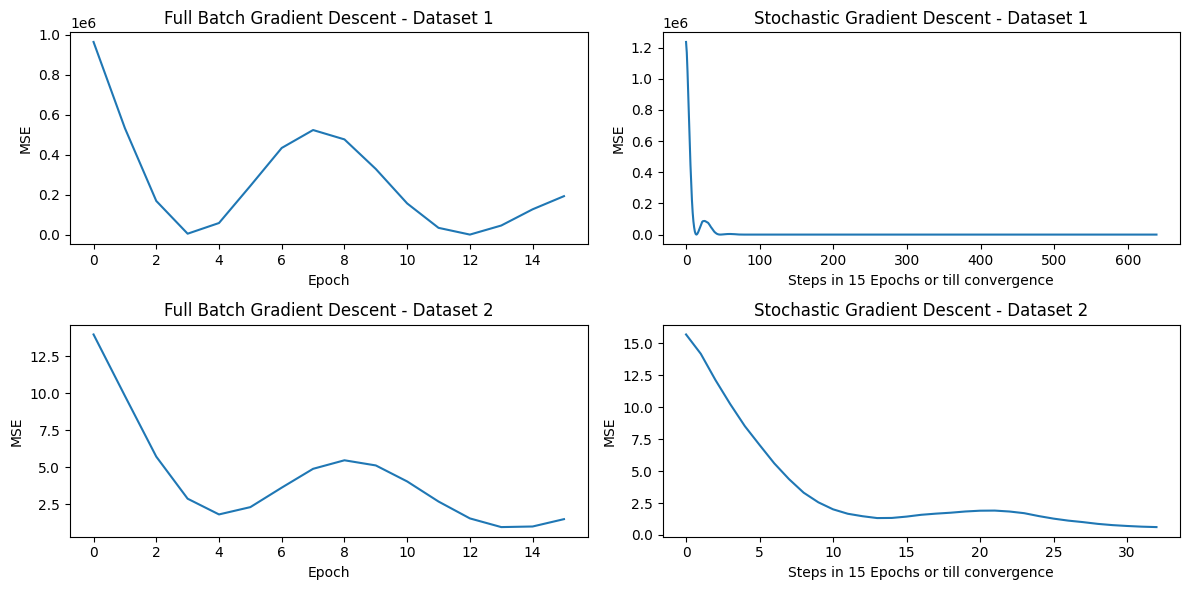

In [ ]:
import matplotlib.pyplot as plt

# Computing MSE history for convergence visualization
steps_gd1, mse_history_dataset1_full_batch, trajectory_dataset1_full_batch_momentum,epochs  = full_batch_gradient_descent_momentum(x1_dataset1, y_dataset1, learning_rate_1_fb, true_mse_dataset1, epsilon, 16)
steps_sgd1, mse_history_dataset1_stochastic, trajectory_dataset1_stochastic_momentum,epochs = stochastic_gradient_descent_momentum(x1_dataset1, y_dataset1, learning_rate_1_sgd, true_mse_dataset1, epsilon, 16)

steps_gd2, mse_history_dataset2_full_batch, trajectory_dataset2_full_batch_momentum,epochs = full_batch_gradient_descent_momentum(x1_dataset2, y_dataset2, learning_rate_2_fb, true_mse_dataset2, epsilon, 16)
steps_sgd2, mse_history_dataset2_stochastic, trajectory_dataset2_stochastic_momentum,epochs = stochastic_gradient_descent_momentum(x1_dataset2, y_dataset2, learning_rate_2_sgd, true_mse_dataset2, epsilon, 16)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(range(len(mse_history_dataset1_full_batch)), mse_history_dataset1_full_batch)
plt.title('Full Batch Gradient Descent - Dataset 1')
plt.xlabel('Epoch')
plt.ylabel('MSE')

plt.subplot(2, 2, 2)
plt.plot(range(len(mse_history_dataset1_stochastic)), mse_history_dataset1_stochastic)
plt.title('Stochastic Gradient Descent - Dataset 1')
plt.xlabel('Steps in 15 Epochs or till convergence')
plt.ylabel('MSE')

plt.subplot(2, 2, 3)
plt.plot(range(len(mse_history_dataset2_full_batch)), mse_history_dataset2_full_batch)
plt.title('Full Batch Gradient Descent - Dataset 2')
plt.xlabel('Epoch')
plt.ylabel('MSE')

plt.subplot(2, 2, 4)
plt.plot(range(len(mse_history_dataset2_stochastic)), mse_history_dataset2_stochastic)
plt.title('Stochastic Gradient Descent - Dataset 2')
plt.xlabel('Steps in 15 Epochs or till convergence')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()


### Effect of momentum
Because of adding momentum, we observe that in both the cases, the optimizer overshoots and jumps through the optimal value a few times until its momentum dies off. This is similar to dropping a ball in a bowl. \


In [ ]:
# Computing average steps to converge
avg_steps_dataset1_full_batch = average_steps_to_converge(x1_dataset1, y_dataset1, true_mse_dataset1, 'full_batch_momentum', learning_rate_1, epsilon, num_trials)
avg_steps_dataset1_stochastic = average_steps_to_converge(x1_dataset1, y_dataset1, true_mse_dataset1, 'stochastic_momentum', learning_rate_1, epsilon, num_trials)

avg_steps_dataset2_full_batch = average_steps_to_converge(x1_dataset2, y_dataset2, true_mse_dataset2, 'full_batch_momentum', learning_rate_2, epsilon, num_trials)
avg_steps_dataset2_stochastic = average_steps_to_converge(x1_dataset2, y_dataset2, true_mse_dataset2, 'stochastic_momentum', learning_rate_2, epsilon, num_trials)

print("Average Steps to Converge (Dataset 1):")
print("Full Batch with momentum:", avg_steps_dataset1_full_batch)
print("Stochastic with momentum:", avg_steps_dataset1_stochastic)

print("\nAverage Steps to Converge (Dataset 2):")
print("Full Batch with momentum:", avg_steps_dataset2_full_batch)
print("Stochastic with momentum:", avg_steps_dataset2_stochastic)

Average Steps to Converge (Dataset 1):
Full Batch with momentum: 2578.0 iterations, 2578.0 epochs
Stochastic with momentum: 2678.65 iterations, 66.35 epochs

Average Steps to Converge (Dataset 2):
Full Batch with momentum: 35.0 iterations, 35.0 epochs
Stochastic with momentum: 48.85 iterations, 0.61 epochs


## Effect of Momentum on:
### Full Batch gradient descent
The above results show that due to added momentum, the updation rate has significantly gotten boosted. Full batch converged in 2578 epochs on dataset 1 as compared to its 648 epochs without momentum on the same learning rate. This is because due to the momentum, the optimizer kept overshooting until its momentum died slowly to converge. The same is true in case of dataset 2, though the effect is not as grand. The epochs have increased from 10 to 35. This is due to overshooting because of the momentum.  
### Stochastic gradient descent
Addition of momentum has sky-rocketed the performance of SGD algorithm. SGD is taking 52 epochs on dataset 1 compared to its 630 epochs earlier.
On dataset 2, it converged even before completing the epoch i.e. it converged before seeing the complete dataset. This is because momentum made the optimizer to keep moving in the current direction, and as in SGD, initially the convergence rate is high because of higher loss, because if momentum it keeps moving in the same direction, causing it to converge even quickly later on.

## Contour plot

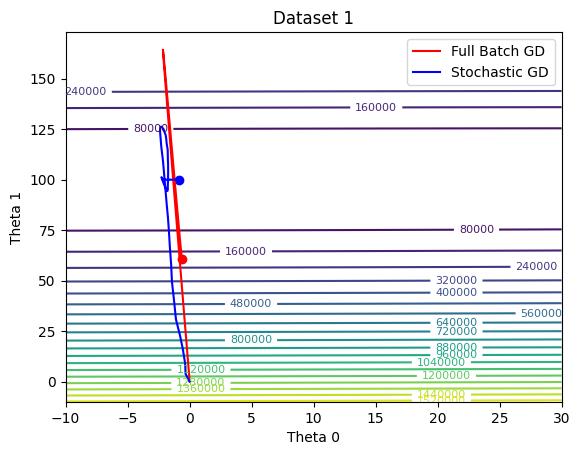

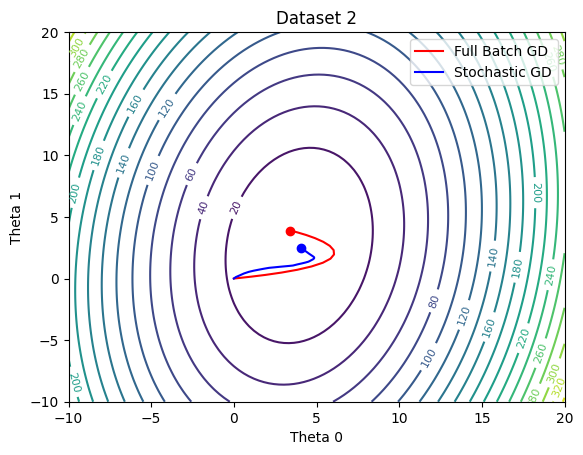

In [ ]:
def plot_contour_with_trajectory(trajectory_fb, trajectory_sg, x, y, true_mse, title,rang):
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel('Theta 0')
    ax.set_ylabel('Theta 1')

    # Create grid for contour plot
    theta0_vals = np.linspace(-10, rang[0], 100)
    theta1_vals = np.linspace(-10, rang[1], 100)
    T0, T1 = np.meshgrid(theta0_vals, theta1_vals)
    Z = np.array([[calculate_mse([t0, t1], x, y) for t0 in theta0_vals] for t1 in theta1_vals])

    # Plot contours
    contours = ax.contour(T0, T1, Z, levels=20, cmap='viridis')
    ax.clabel(contours, inline=True, fontsize=8)

    # Plot trajectories
    ax.plot([point[0] for point in trajectory_fb], [point[1] for point in trajectory_fb], color='red', label='Full Batch GD')
    ax.scatter(trajectory_fb[-1][0], trajectory_fb[-1][1], color='red')
    ax.plot([point[0] for point in trajectory_sg], [point[1] for point in trajectory_sg], color='blue', label='Stochastic GD')
    ax.scatter(trajectory_sg[-1][0], trajectory_sg[-1][1], color='blue')

    ax.legend()

# Plot contour with trajectories for Dataset 1
plot_contour_with_trajectory(trajectory_dataset1_full_batch_momentum, trajectory_dataset1_stochastic_momentum, x1_dataset1, y_dataset1, true_mse_dataset1, 'Dataset 1',[30,150])

plt.show()

# Plot contour with trajectories for Dataset 2
plot_contour_with_trajectory(trajectory_dataset2_full_batch_momentum, trajectory_dataset2_stochastic_momentum, x1_dataset2, y_dataset2, true_mse_dataset2, 'Dataset 2',[20,20])

plt.show()


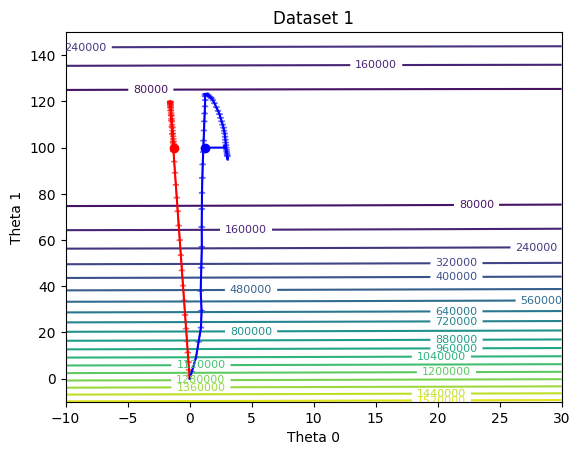

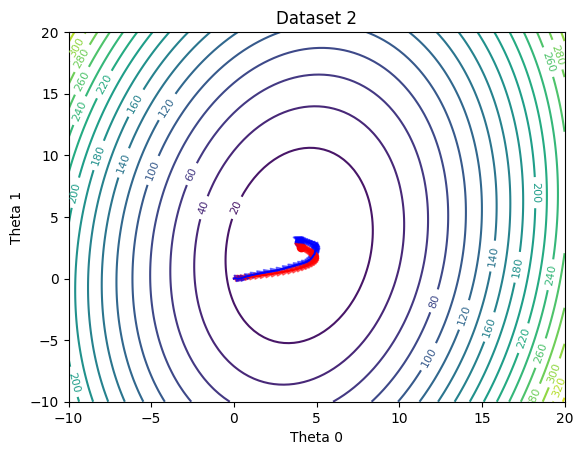

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_mse(theta, x, y):
    num_samples = len(y)
    x = np.c_[np.ones(num_samples), x]  # Add intercept term
    y_pred = np.dot(x, theta)
    mse = np.mean((y_pred - y) ** 2)
    return mse

def plot_contour_with_trajectory(trajectory_fb, trajectory_sg, x, y, true_mse, title, rang):
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel('Theta 0')
    ax.set_ylabel('Theta 1')

    # Create grid for contour plot
    theta0_vals = np.linspace(-10, rang[0], 100)
    theta1_vals = np.linspace(-10, rang[1], 100)
    T0, T1 = np.meshgrid(theta0_vals, theta1_vals)
    Z = np.array([[calculate_mse([t0, t1], x, y) for t0 in theta0_vals] for t1 in theta1_vals])

    # Plot contours
    contours = ax.contour(T0, T1, Z, levels=20, cmap='viridis')
    ax.clabel(contours, inline=True, fontsize=8)

    # Plot trajectories
    ax.plot([point[0] for point in trajectory_fb], [point[1] for point in trajectory_fb], color='red', label='Full Batch GD')
    ax.scatter(trajectory_fb[-1][0], trajectory_fb[-1][1], color='red')

    ax.plot([point[0] for point in trajectory_sg], [point[1] for point in trajectory_sg], color='blue', label='Stochastic GD')
    ax.scatter(trajectory_sg[-1][0], trajectory_sg[-1][1], color='blue')

    # Plot vectors (gradients, current values of theta, momentum, etc.)
    for i in range(1, min(len(trajectory_fb),len(trajectory_sg))):
        ax.arrow(trajectory_fb[i-1][0], trajectory_fb[i-1][1], trajectory_fb[i][0]-trajectory_fb[i-1][0], trajectory_fb[i][1]-trajectory_fb[i-1][1], head_width=0.5, head_length=0.5, fc='red', ec='red', alpha=0.5)
        ax.arrow(trajectory_sg[i-1][0], trajectory_sg[i-1][1], trajectory_sg[i][0]-trajectory_sg[i-1][0], trajectory_sg[i][1]-trajectory_sg[i-1][1], head_width=0.5, head_length=0.5, fc='blue', ec='blue', alpha=0.5)




# Plot contour with trajectories for Dataset 1
plot_contour_with_trajectory(trajectory_dataset1_full_batch_momentum, trajectory_dataset1_stochastic_momentum, x1_dataset1, y_dataset1, None, 'Dataset 1', [30,150])
plt.show()

# Plot contour with trajectories for Dataset 2
plot_contour_with_trajectory(trajectory_dataset2_full_batch_momentum, trajectory_dataset2_stochastic_momentum, x1_dataset2, y_dataset2, None, 'Dataset 2', [20,20])
plt.show()


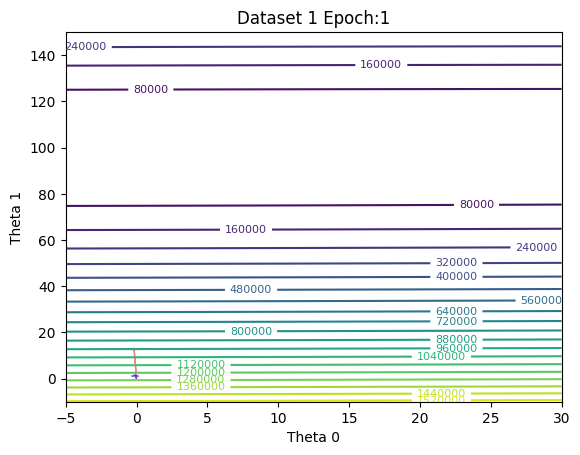

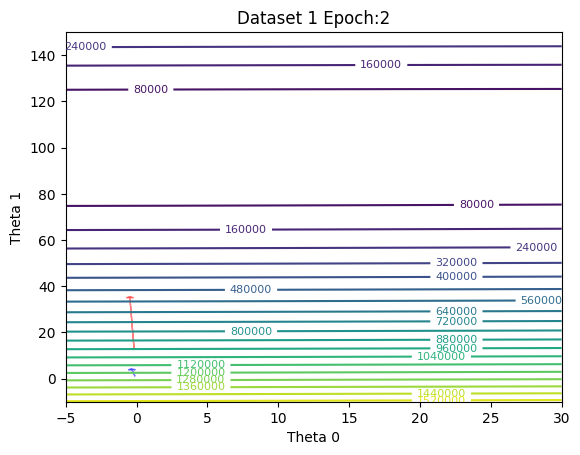

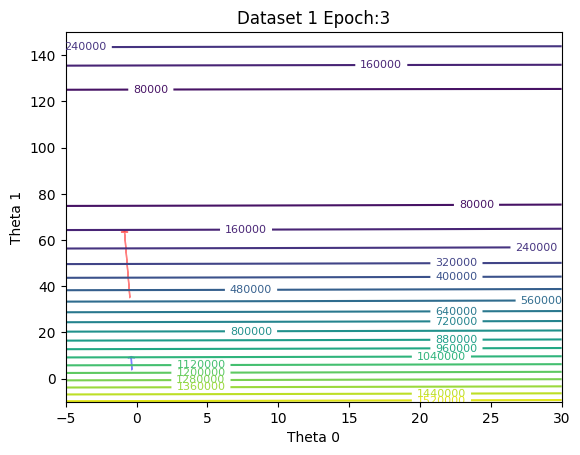

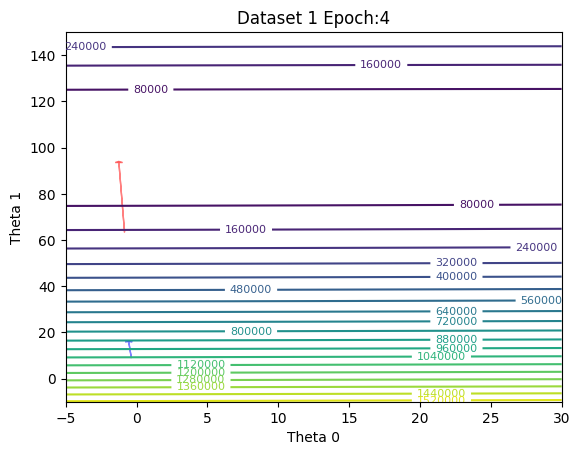

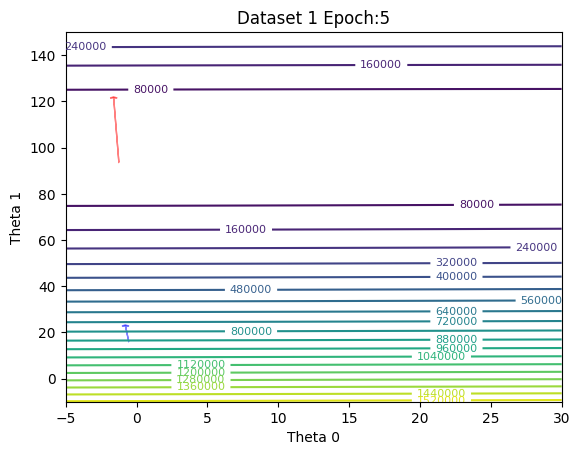

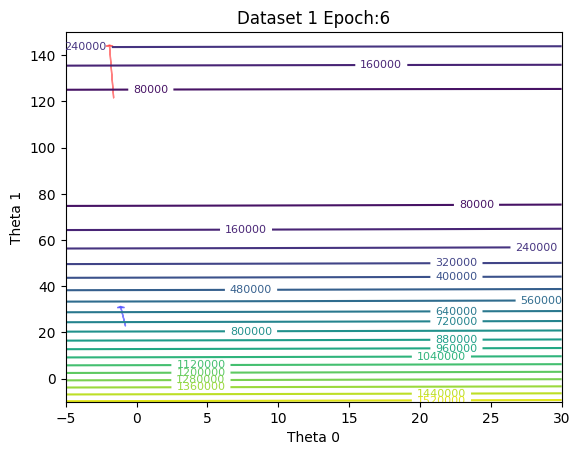

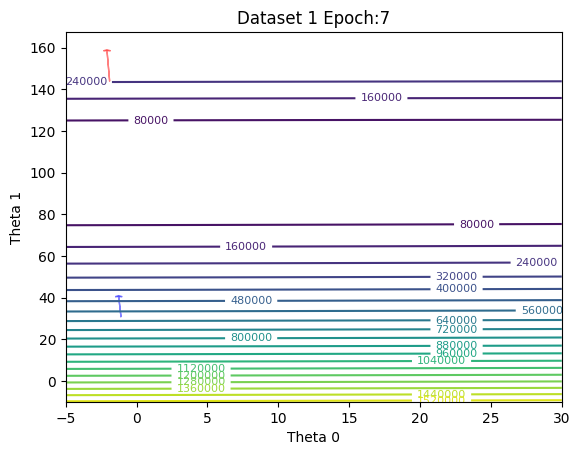

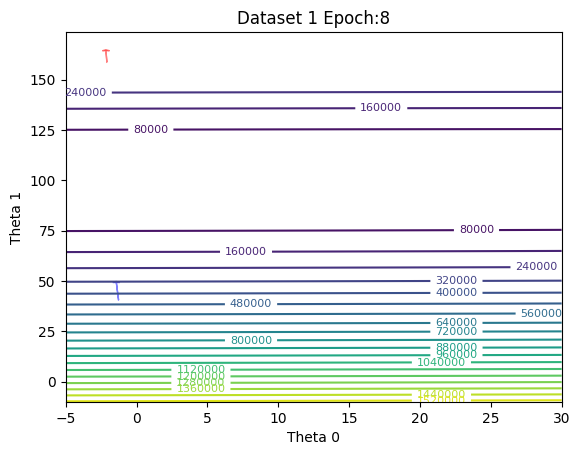

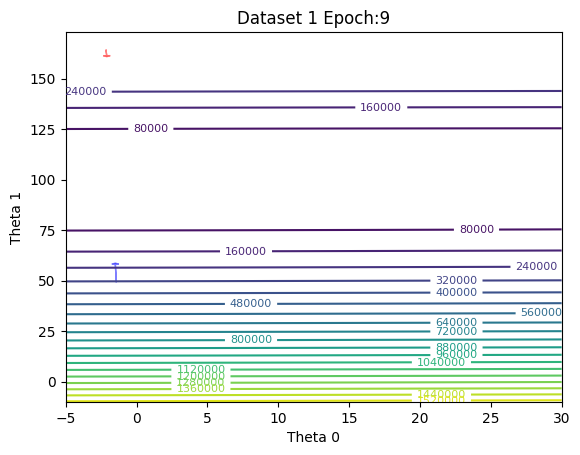

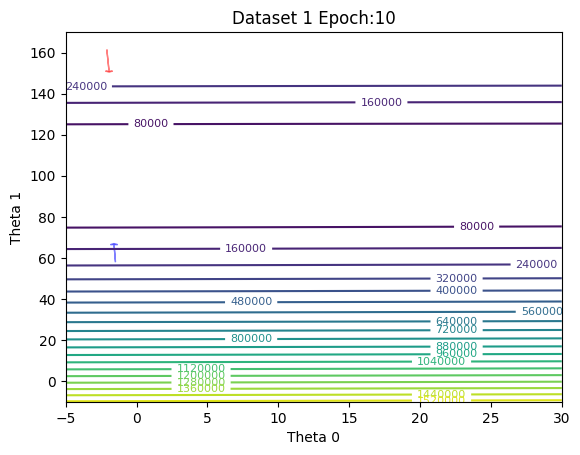

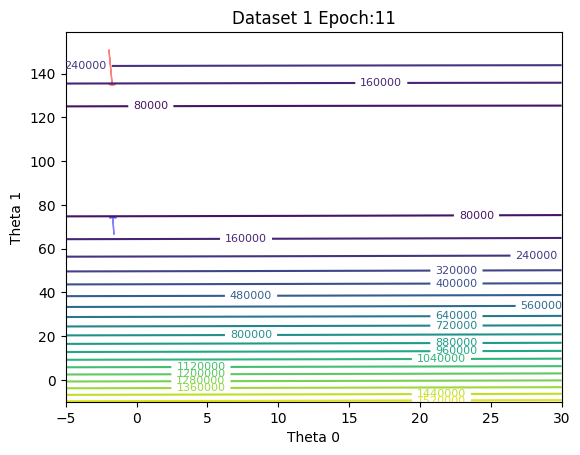

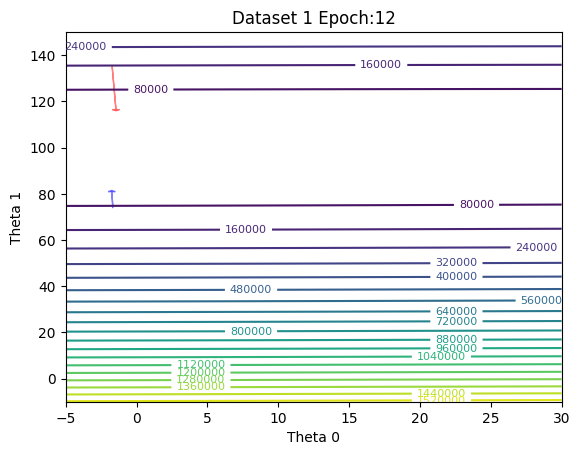

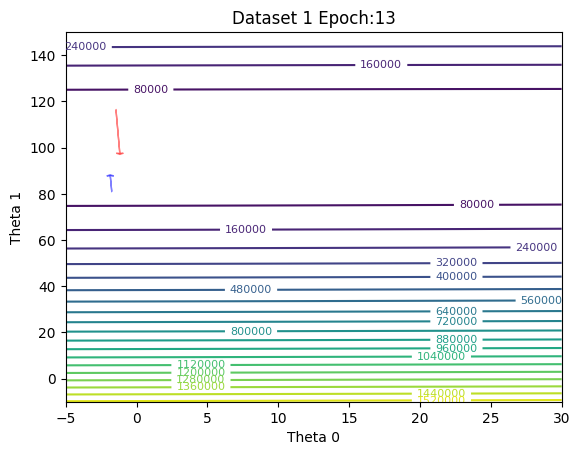

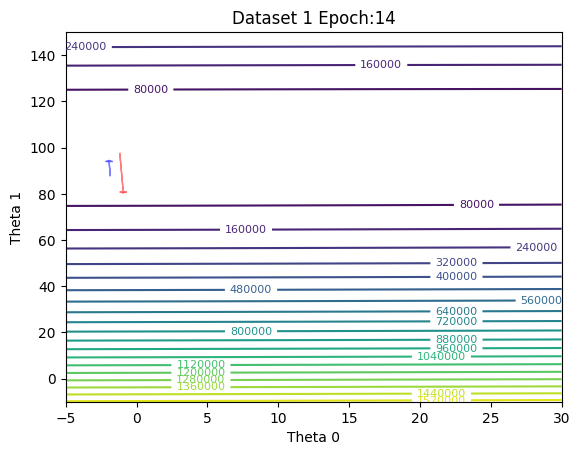

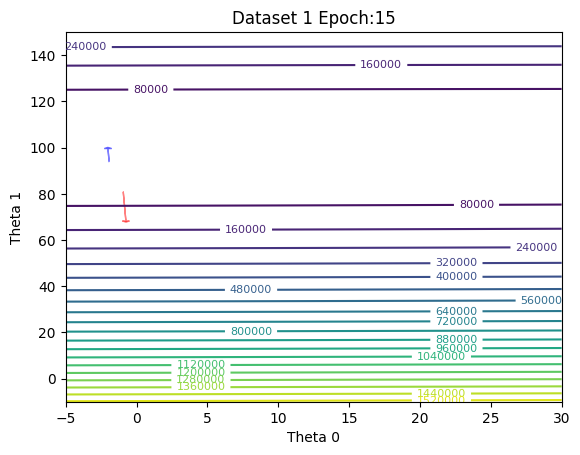

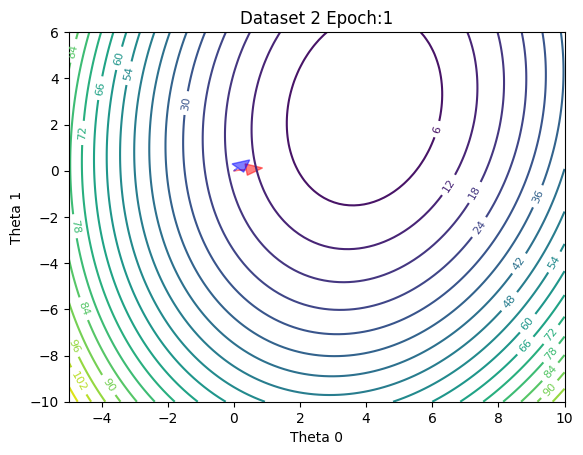

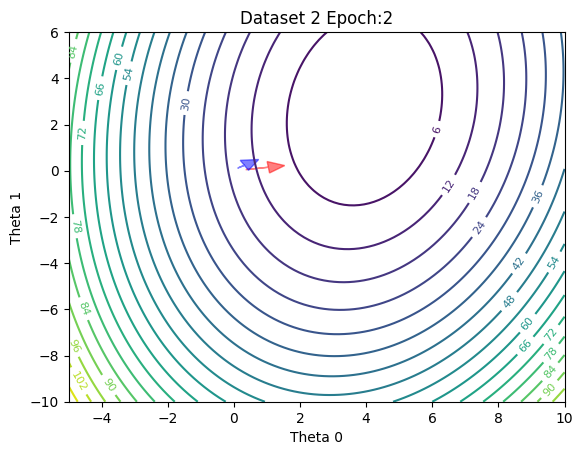

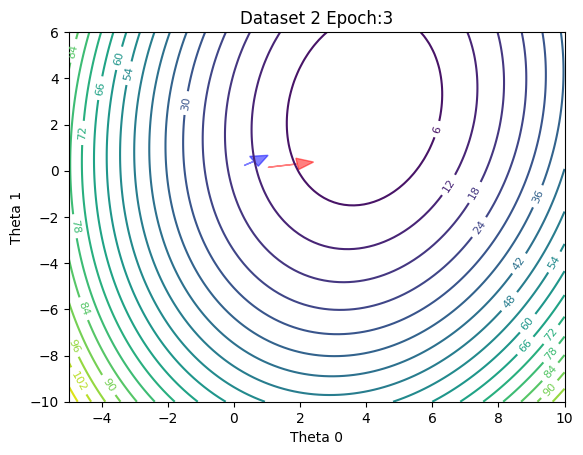

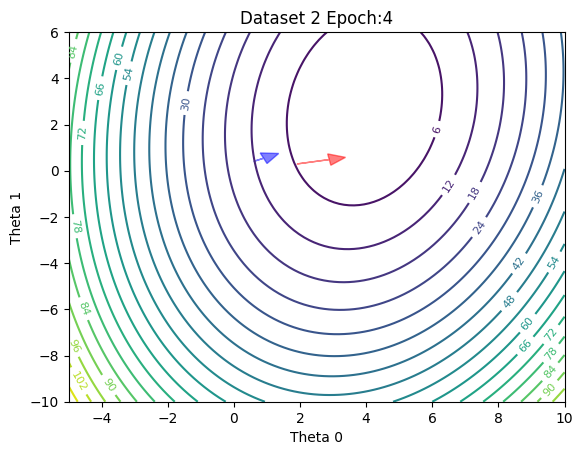

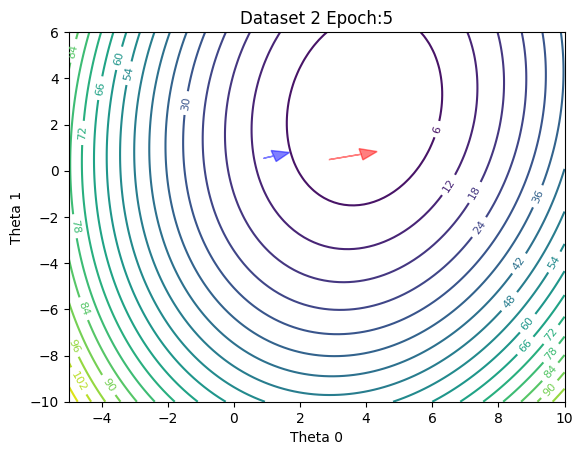

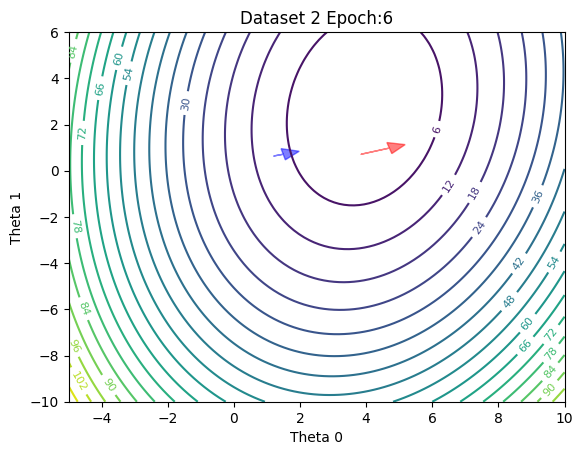

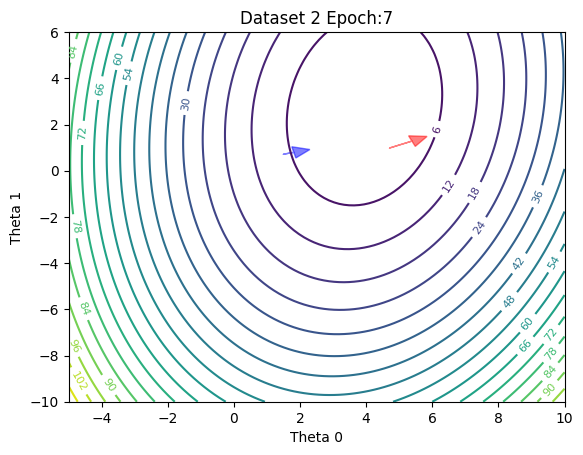

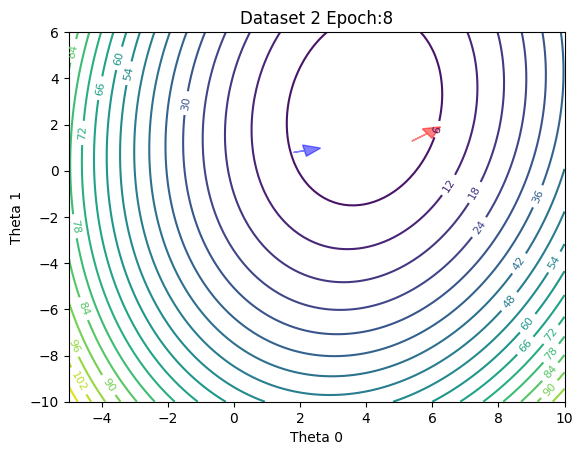

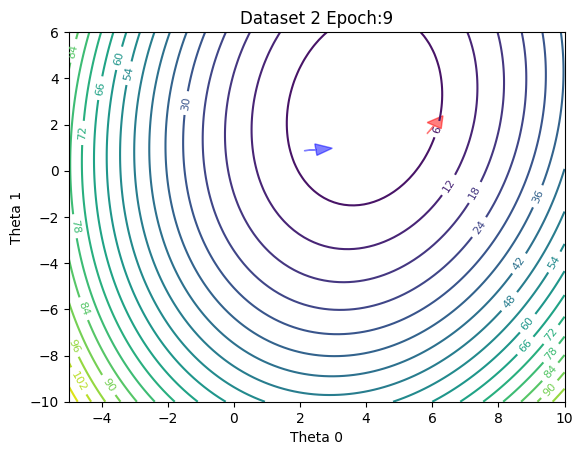

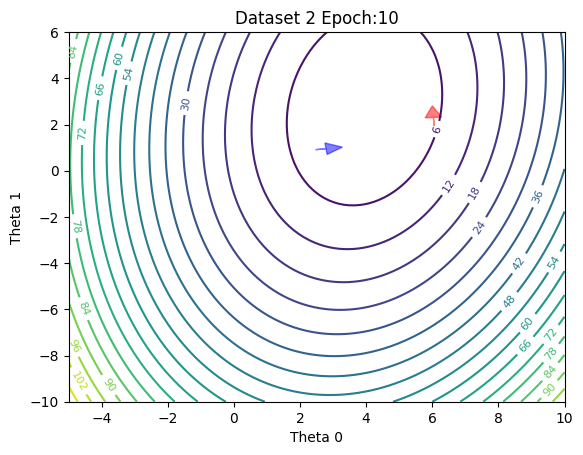

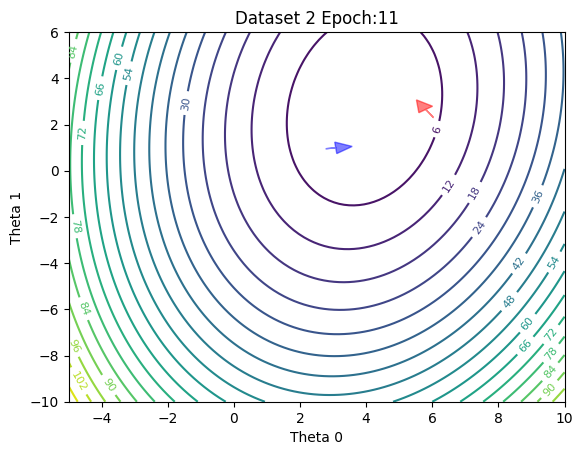

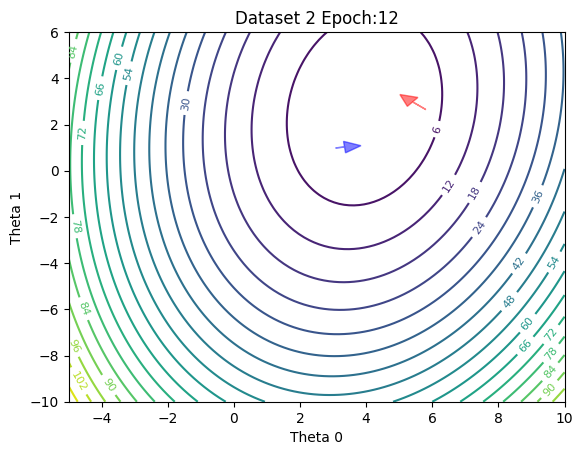

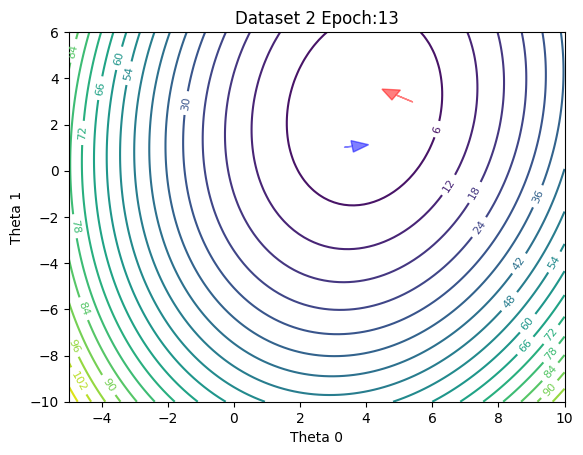

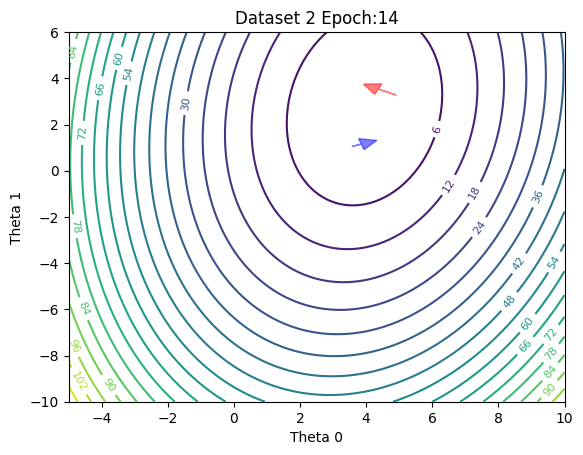

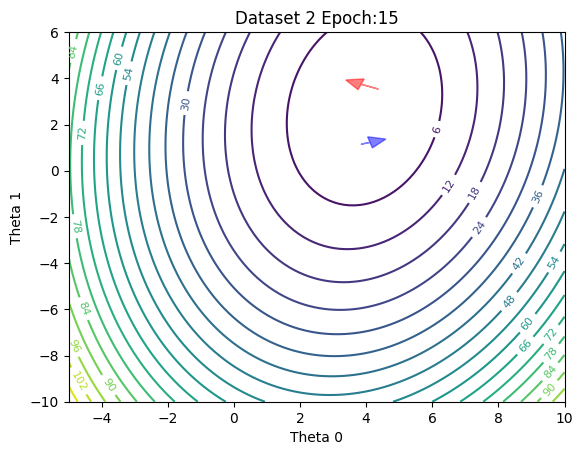

In [ ]:
def plot_contour_with_trajectory(trajectory_fb, trajectory_sg, x, y, true_mse, title, rang):

    # Create grid for contour plot
    theta0_vals = np.linspace(-5, rang[0], 100)
    theta1_vals = np.linspace(-10, rang[1], 100)
    T0, T1 = np.meshgrid(theta0_vals, theta1_vals)
    Z = np.array([[calculate_mse([t0, t1], x, y) for t0 in theta0_vals] for t1 in theta1_vals])

    # Plot contours

    # Plot trajectories

    # Plot vectors (gradients, current values of theta, momentum, etc.)
    for i in range(1, min(len(trajectory_fb),len(trajectory_sg),16)):
        fig, ax = plt.subplots()
        ax.set_title(f'{title} Epoch:{i}')
        ax.set_xlabel('Theta 0')
        ax.set_ylabel('Theta 1')
        contours = ax.contour(T0, T1, Z, levels=20, cmap='viridis')
        ax.clabel(contours, inline=True, fontsize=8)
        ax.arrow(trajectory_fb[i-1][0], trajectory_fb[i-1][1], trajectory_fb[i][0]-trajectory_fb[i-1][0], trajectory_fb[i][1]-trajectory_fb[i-1][1], head_width=0.5, head_length=0.5, fc='red', ec='red', alpha=0.5)
        ax.arrow(trajectory_sg[i-1][0], trajectory_sg[i-1][1], trajectory_sg[i][0]-trajectory_sg[i-1][0], trajectory_sg[i][1]-trajectory_sg[i-1][1], head_width=0.5, head_length=0.5, fc='blue', ec='blue', alpha=0.5)





# Plot contour with trajectories for Dataset 1
plot_contour_with_trajectory(trajectory_dataset1_full_batch_momentum, trajectory_dataset1_stochastic_momentum, x1_dataset1, y_dataset1, None, 'Dataset 1', [30,150])
plt.show()

# Plot contour with trajectories for Dataset 2
plot_contour_with_trajectory(trajectory_dataset2_full_batch_momentum, trajectory_dataset2_stochastic_momentum, x1_dataset2, y_dataset2, None, 'Dataset 2', [10,6])
plt.show()

In [ ]:
def full_batch_gradient_descent_momentum_2(x, y, learning_rate, true_mse, epsilon, max_iter=10000, momentum=0.9):
    num_samples = len(y)
    x = np.c_[np.ones(num_samples), x]  # Add intercept term
    theta = np.zeros(x.shape[1])
    steps = 0
    theta_history=[theta.copy()]
    mse_history=[]
    gradients=[]
    momentums=[]
    change=0
    while steps < max_iter:
        gradient = np.dot(x.T, np.dot(x, theta) - y) / num_samples
        gradients.append(-1*gradient.copy())
        new_change = learning_rate*gradient + momentum*change
        theta -= new_change
        theta_history.append(theta.copy())
        change = new_change
        momentums.append(-1*change.copy())
        mse = calculate_mse(theta, x[:, 1:], y)
        mse_history.append(mse)
        if mse < true_mse + epsilon:
            steps+=1
            break
        steps += 1
    return steps,mse_history,theta_history,steps,gradients,momentums

def stochastic_gradient_descent_momentum_2(x, y, learning_rate, true_mse, epsilon, max_iter=10000, momentum=0.9):
    num_samples = len(y)
    x = np.c_[np.ones(num_samples), x]  # Add intercept term
    theta = np.zeros(x.shape[1])
    steps = 0
    theta_history=[theta.copy()]
    mse_history=[]
    change=np.zeros(theta.shape)
    epochs=0
    gradients=[]
    momentums=[]
    while epochs < max_iter:
        D = np.concatenate((x.reshape((40,2)),y.reshape((40,1))),axis=1)
        np.random.shuffle(D)
        x = D[:,:-1].reshape((40,2))
        y = D[:,-1:].reshape((40,))
        for i in range(num_samples):
            gradient = np.dot(x[i], np.dot(x[i], theta) - y[i])
            gradients.append(-1*gradient.copy())
            momentums.append(-1*change.copy())
            new_change = learning_rate*gradient + momentum*change
            theta -= new_change
            theta_history.append(theta.copy())
            change=new_change
            mse = calculate_mse(theta, x[:, 1:], y)
            mse_history.append(mse)
            if mse < true_mse + epsilon:
                steps+=1
                break
            steps += 1
        if mse < true_mse + epsilon:
                steps+=1
                break
        epochs += 1
    return steps,mse_history,theta_history,epochs,gradients,momentums


def vector(trajectory,gradients,momentums):
    plt.figure()
    for i in range(1,15):
        plt.plot(trajectory[i][0], trajectory[i][1], marker='o', color='red', markersize=5)
        plt.quiver(trajectory[i][0], trajectory[i][1],gradients[i][0],gradients[i][1],color = 'g', label='Gradient' if i==1 else None)
        plt.quiver(trajectory[i][0], trajectory[i][1],momentums[i][0],momentums[i][1],color = 'b', label='Momentum' if i==1 else None)
        plt.xlim()
        plt.ylim()
        plt.tight_layout()
    plt.legend()

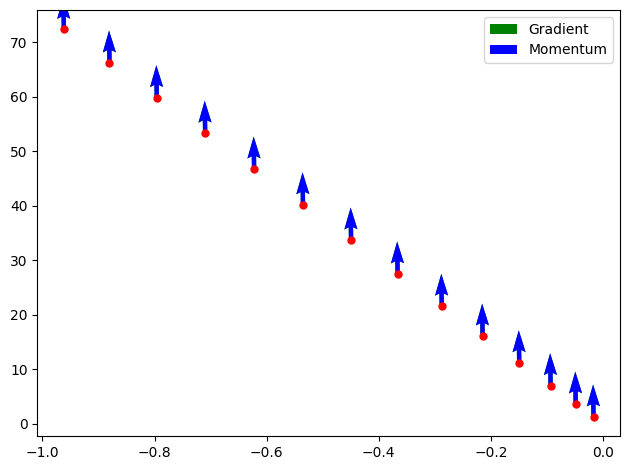

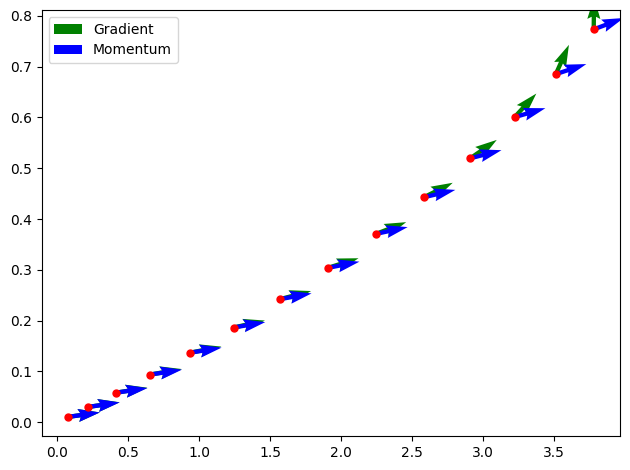

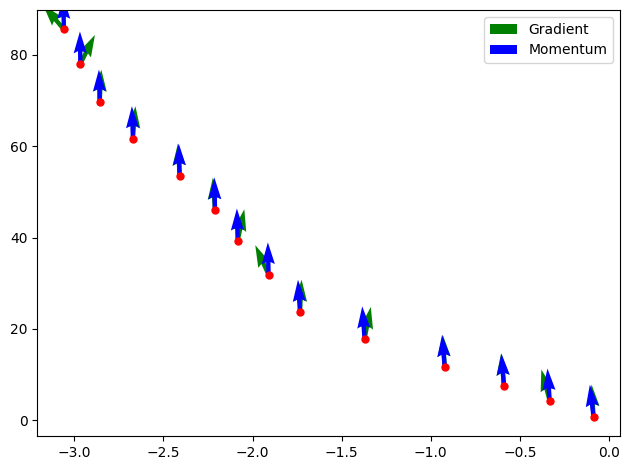

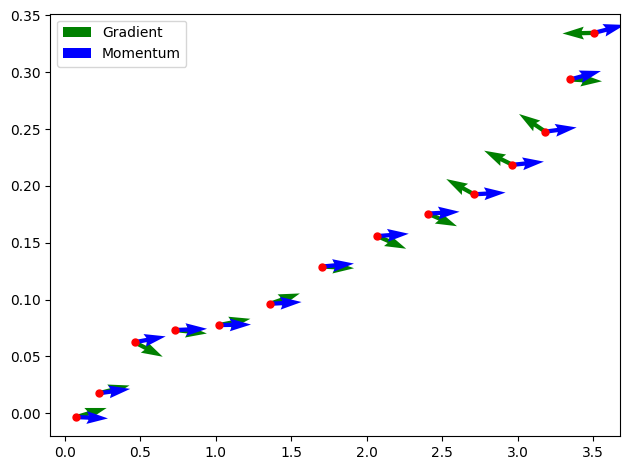

In [ ]:
steps_gd1, mse_history_dataset1_full_batch, trajectory_dataset1_full_batch_momentum,epochs,gradients_fb1,momentums_fb1  = full_batch_gradient_descent_momentum_2(x1_dataset1, y_dataset1, learning_rate_1_fb, true_mse_dataset1, epsilon, 16)
steps_sgd1, mse_history_dataset1_stochastic, trajectory_dataset1_stochastic_momentum,epochs,gradients_sgd1,momentums_sgd1 = stochastic_gradient_descent_momentum_2(x1_dataset1, y_dataset1, learning_rate_1_sgd, true_mse_dataset1, epsilon, 16)

steps_gd2, mse_history_dataset2_full_batch, trajectory_dataset2_full_batch_momentum,epochs,gradients_fb2,momentums_fb2 = full_batch_gradient_descent_momentum_2(x1_dataset2, y_dataset2, learning_rate_2_fb, true_mse_dataset2, epsilon, 16)
steps_sgd2, mse_history_dataset2_stochastic, trajectory_dataset2_stochastic_momentum,epochs,gradients_sgd2,momentums_sgd2 = stochastic_gradient_descent_momentum_2(x1_dataset2, y_dataset2, learning_rate_2_sgd, true_mse_dataset2, epsilon, 16)

vector(trajectory_dataset1_full_batch_momentum,gradients_fb1,momentums_fb1)
vector(trajectory_dataset2_full_batch_momentum,gradients_fb2,momentums_fb2)
vector(trajectory_dataset1_stochastic_momentum,gradients_sgd1,momentums_sgd1)
vector(trajectory_dataset2_stochastic_momentum,gradients_sgd2,momentums_sgd2)
